# Modern Neural Networks

## Introduction

This project aims to explore more on Convolutional Neural Networks (CNN) and its concepts or building blocks, that was expanded from Fully-connected networks, for the purpose of tackling computer vision tasks or problems. This notebook will demonstrate building a CNN with the TensorFlow API (as well as the Keras API). It will also explore the modern methods on training the model to imrpove its robustness in practice.

## Breakdown of this Notebook:
- CNNs concepts.
- CNNs' relevance for Computer Vision Tasks.
- Implementation of CNNs in TensorFlow and Keras.
- Advanced optimisers and training of CNNs in an efficient manner.
- Regularisation methods to prevent overfitting.

## Requirements:
- Tensorflow 2.0
- Keras (but the tf.keras version, not the standalone Keras library)
- Scikit-image

## Dataset:


### Import the required libraries:

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from skimage import io, color

## 1 - A General description of CNNs:

CNNs (a.k.a ConvNets) have been in used for computer vision tasks where it was introduced to address some of the shortcomings that were present in the original Neural Networks (Fully Connected Networks). These problems had prevented the Neural Networks from achieving better accuracy/results.

## 1.1 - Problems surrounding Fully Connected Networks:

The two main issues/drawbacks of the basic Neural Networks (NNs) when tackling images were:
1. An explosive number of parameters.
2. A lack of spatial reasoning.

### 1.1.1 - An Explosive Number of Parameters:

Digital Images are composed of a large number of values like the height (H), width (W), depth or number of colour channels (D, where for RGB colours D = 3). For single channel images which are grey in colour, then D = 1. In terms of number of parameters, for a basic NN, the weight matrix of the shape (784, 64) for one image will equate to 50,176 parameter values that will be required to be optimised by the network. 

### 1.1.2 - A lack of Spatial Reasoning:

A lack of spatial reasoning relates to the fact that NNs do not have a notion about distance or spatial relations as its neurons receives all the ouput values of the previous layer without any particular distinction. This is largely due to their fully connected architecture. It also means that the notion of proximity between the pixel data is lost when it is computed through the fully connected (FC) layers of the NN, where all these values are combined by the layers with no regards to their original positions. 

### Therefore, to improve on the NN's performance, there is a need to account for these spatial data/information that resides in these images, where some of the input values can belong to the same pixel/channel values or same image region/neighbour pixels. This is where CNNs come into play.

## 2 - An Introduction to CNNs's Core Concepts (Building Blocks):

There are some changes (or add-ons) to the FC-NN architecture that improves on the shortcomings mentioned in the previous section. Firstly, CNNs have been improved to handle multi-dimensional data, where for image data that has an input of 3-Dimensions (H x W x D), it arranges its neurons accordingly in a similar volume, leading to the second novelty of this kind of CNN architecture. Unlike FC-NNs, each of CNN's neurons are created to only have access to some of the elements of its neighbouring region from the previous layer. This region can be defined as the __receptive field__ of the neurons or similarly its filter size. This kind of linking fwith the previous layer reduces the numebr of parameters that is required to be trained as well as preserving the localisation (local connectivity) of the image features.

#### The following diagram shows a CNN architecture and the receptive fields through the layers:

In [2]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
from matplotlib import animation

# %matplotlib inline

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

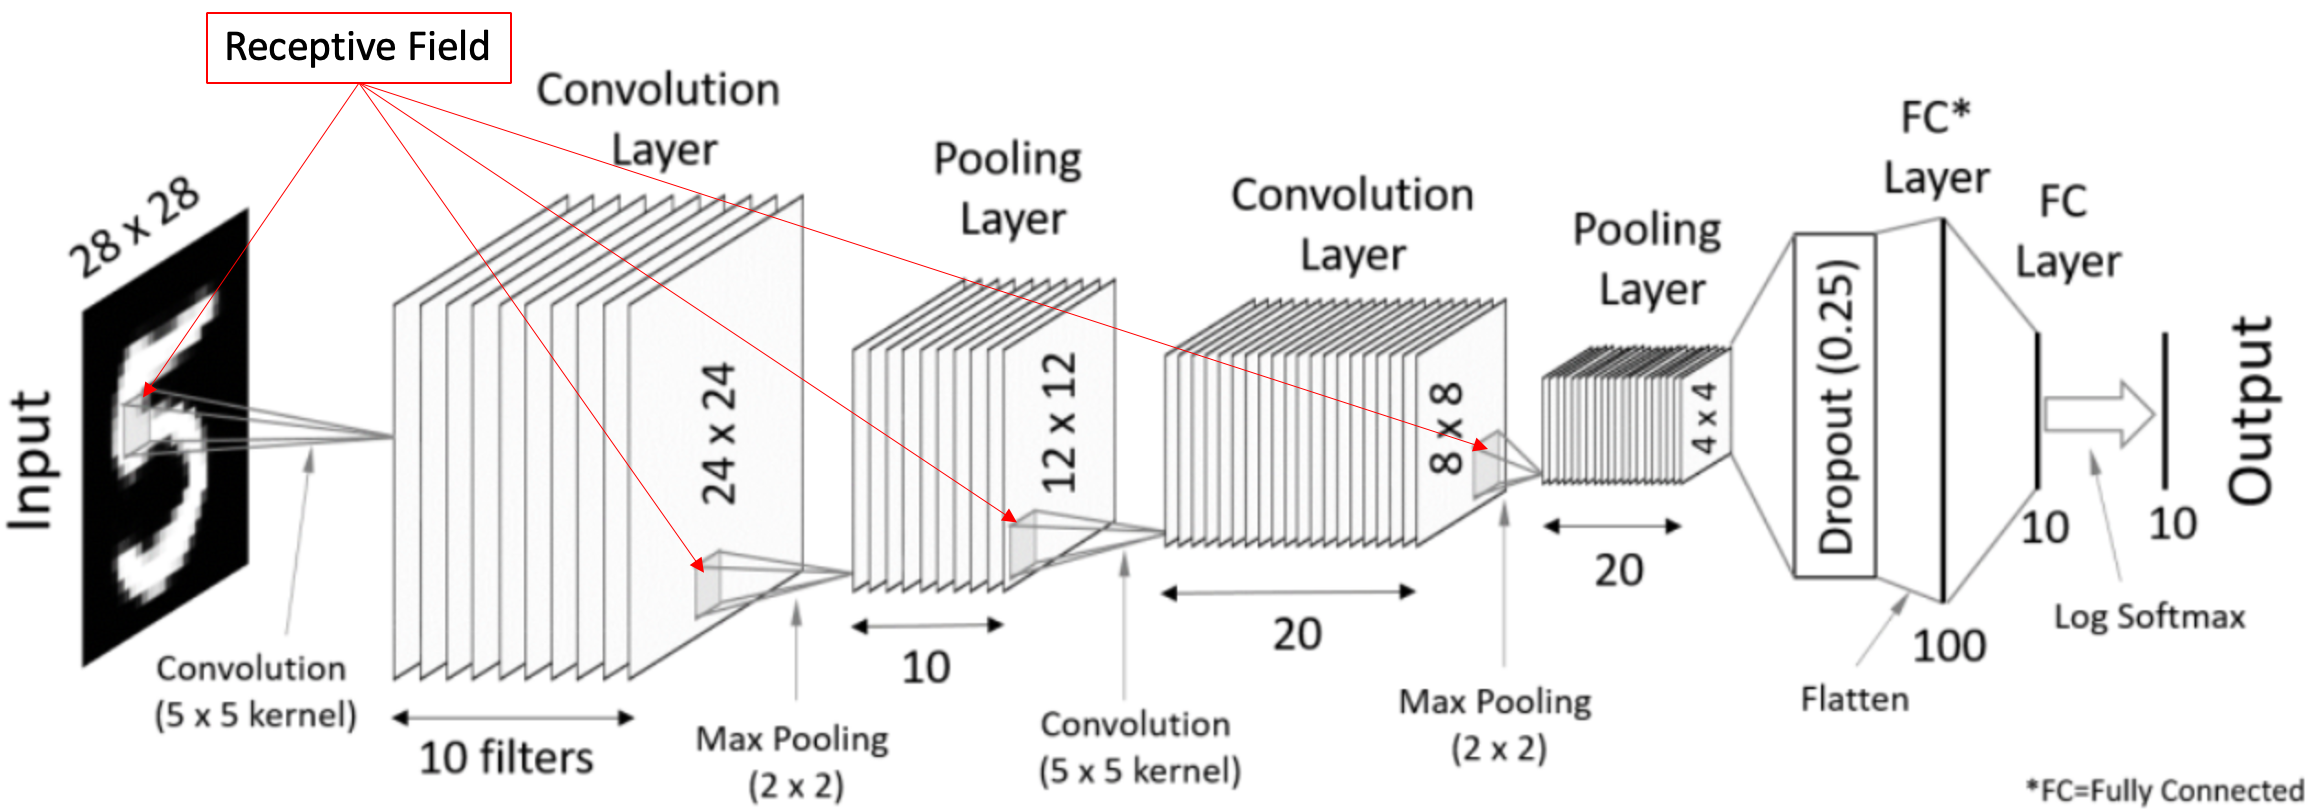

Image ref -> http://fourier.eng.hmc.edu/e176/lectures/ch10/node8.html


In [3]:
# CNN Architecture and Receptive Field: 
display(Image(image_path + 'CNN Architecture and Receptive Field.png', width=1100, unconfined=True))
print('Image ref -> http://fourier.eng.hmc.edu/e176/lectures/ch10/node8.html')

Notice how the receptive field is a small part of the image rather than its entirety.

## 2.1 - CNN Operations:

As previously described, CNNs takes advantage of new types of layers that accounts for __mult-dimensionality__ and __local connectivity__ of the input data. The following lists the concepts that will be covered in this section.

### List of CNN Operations:
1. Convolutional Layers
    - Concept
    - Properties
    - Hyperparameters
    - TF and Keras implementations
2. Pooling Layers
    - Concept and Hyperparamters
    - TF and Keras implementations
3. Fully Connected Layers
    - Usage in the CNN architecture
    - TF and Keras implementations
4. Effective Receptive Field:
    - Definition
    - Formula
    
## 2.2 - Convolutional Layers:

For more information:
- https://ronjian.github.io/blog/2018/03/23/CNN
- https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215
- https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
- https://blog.xrds.acm.org/2016/06/convolutional-neural-networks-cnns-illustrated-explanation/
- https://www.kdnuggets.com/2015/11/understanding-convolutional-neural-networks-nlp.html

### 2.2.1 - Concept of Convolutions:

Convolutions are the core of the CNN architecture and it is the component that gives CNNs its capabilities in dealing with images. Essentially, a convolution over an image (input matrix data) can be thought of as a sliding window, that is the Kernel (or Filter), applied to the input matrix. 

#### To demonstrate this, the following diagram shows how a kernel is sliding over the input matrix:

In [4]:
# # Illustration of the convolutions:
# with open(image_path + 'conv_cs231n.gif','rb') as f:
#     display(Image(data=f.read(), format='png'))

As it can be seen the diagram above, the input matrix has a shape of (7 x 7 x 3) that is padded with zeros around the border, where the "3" represents the RGB channels. There are also two different kernels that are being applied, where these are Filter W0 and W1 consisting of the shape of (3 x 3 x 3), again "3" for RGB. For each step of sliding, it performs the same computation of $z = W * X + b$. In other words, the results of the convolution are obtained by sliding a filter (W) over the input matrix (X) and computing the dot product of the filter and the patch of X at the current position. For each step of sliding, it produces a single output value until the whole matrix is filled, and due to the padding on the input, these resulting output matrix has a shape of (3 x 3). It repeats this process for the first kernel (W0) and then proceeds to the next kernel (W1). 

Similarly it can be thought of as a single neuron (with shared weights and bias) that is sliding over the whole input matrix with spatially limited connectivity, where at each of these steps, the neuron is spatially connected to a local region that it is currently sliding over of the input volume (H x W x D). As a convolutional layer have N sets of neurons, the response maps are then stacked together into an output tensor with a dimensional shape of $H_{o} * W_{o} * N$.

Note: The input volumes can also be seen to have a padding of zeros, this can be seen as the border of zeros around the original input matrix. This is common practice to help ensure that the output remains the same size as the original input. 

#### Mathematically:

The response $z_{i,j}$ of the neuron can be expressed with the following:

$$ z_{i,j} = \sigma ( b + \sum_{l=0}^{k_{H}-1} \sum_{m=0}^{k_{W}-1} \sum_{n=0}^{k_{D}-1} W_{l,m,n} *  x_{i+1, j+1, n} )$$

Where, 
- W are the neuron's weights.
- b is the bias.
- $ \sigma $ is the activation function.

### 2.2.2 - Properties:

A convolutional layer that has N sets of neurons can be defined by N weight matrices (kernels) that has the shape of $ D * k * k  $ for a square kernel and has N number of bias values. In terms of parameter numbers, this layer would equate to $ N * (D * k^{2} + 1) $ parameters to train, whereas for a FC-layer the number of parameters to train on wwould equate to $ (H * W * D) * (H_{o} * W_{o} * N) $. This means that the convolutional layers are not affected by the dimensionality of the data like FC-layers are. These intermediary output reulst of the conolutional layers are called __feature maps__ abd the number of feature maps is the same ass the number of kernels used. A stack of these features according to N feature maps are called a __feature volume__ denoted as $ (H_{o} * W_{o} * N) $. These feature maps contribute to the outcome prediction during training, and for new data as well. 

This is the property that gives convolutional layers its power when it comes to computer vision tasks. There are two reasons for this, where the first is that training the network with larger input images wont impact the parameters count and the second is that the convolutional layers can be applied to any images of different sizes.

Further, the kernels in a layer were found to be good at identifying specific local features of an image. For exmaple, when the architecture of a CNN consist of more than one convolutional layer, it can be seen that the first convolutional layer would learn to activate on specific low-level features such as line orientation or colour gradients. when it comes to the deeper convolutional layers, it can be seen that it is able to extract and activate on more advanced features (or abstract features) such as the shape of a face, contours of an object. Overall this means that the convolutional layers are invariant to translation in the image coordinate space. 

### 2.2.3 - Hyperparameters:

The convolutional layer can be defined by the number of kernels (N) by its input depth (D, number of colour channels) and by the kernel size ($k_{H}$, $k_{W}$). Typically, square kernels are the ones being used most often and its size can be simplified as "k". Although the mathematicaly operation that is $z = W * X + b$, is straightforward, there are additional things to consider such as the sliding over images. 

The amount of sliding the kernel performs over the input matrix is determined by the hyperparameter __Stride__ (s). The Stride defines the dot product between the kernel (weights) and the input matrix at every position during sliding. For example, a Stride = 1 means that the kernel will slide across (and eventually over each row) at a pace of 1 block at a time, if the Stride =  means that the kernel will slide acroos at a pace of 2 blocks at a time. This means that as the Stride is set to a larger value, the feature maps outputed from this operation will be sparser.

Further, the input images can be __padded__ (p, __padding__) with zeros before the convolution process. This is where the input image sizes are artificially increaded by the addition of rows and columns of zeros around it, like a border. Note that this will also increase the amount of sliding the kernel window has to perform as well.

The combination of the padding, stride and input image size can determine the output shape and also the inherent increase computations as well. To compute the output matrix sizes, it can be done with the following formulas:

$$ H_{o} = \frac{H - k + 2p}{s} + 1 $$ and $$ W_{o} = \frac{W - k + 2p}{s} + 1 $$

Where,
- $H_{o}$ is the output height shape.
- $W_{o}$ is the output width shape.
- H is the input height shape.
- W is the input width shape.
- k is the kernel size. 
- p is the padding.
- s is the stride.

Filters that is of size k can only have a maximum of H - k + 1 vertical positions and W - k + 1 horizontal positions for a given input of H x W sized image. Overall, these hyperparameters can be adjusted to control the layer's output sizes for the feature maps. This is convenient when it comes to the application of object segmentation.

### 2.2.4 - TF and Keras Implementations:

Performing convolutions with the available low-level API can be done with "tf.nn.conv2d()". It has a few main parameters such as:
1. input - the batch of input images with a shape of (B, H, W, D), where B is the batch size.
2. filter - is the "N" number of kernels stacked into a tensor of a shape ($k_{H}$, $k_{W}$, D, N).
3. strides - consist of a list of 4 integers that represents the stride for each of the dimension of the batched input. Seen as $[1, s_{H}, s_{W}, 1]$
4. padding - this can beeither a list of 4 x 2 integers to represent the padding placed before and after each dimension of the batched input, or it is a string that can be either "VALID" or "SAME".
5. name - is the namde to identify the operation for clearer and readable graphs.

#### The following will demonstrate how the Convolutions are done in code:

#### 2.2.4.1 - Load in the Sample Image:

The image can be found in the folder "MNN Image Manipulations" that is included with this repo.

In [5]:
# Set up the working directory for the sample images:
sampleImage_folderName = 'MNN Image Manipulations'
sampleImage_path = os.path.abspath(sampleImage_folderName) + '/'


sample_img = io.imread(sampleImage_path + 'Eiffel Tower.jpg')

Image shape: (1001, 1600, 3)


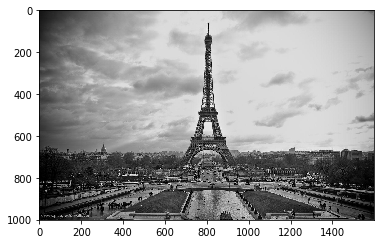

In [6]:
# Print to show the sample image:
print('Image shape: {}'.format(sample_img.shape))
plt.imshow(sample_img, cmap = plt.cm.gray)

NOTICE: It can be seen that the shape output has a "3" at the end, this means that the image is in RGB and will require to be converted to Grayscale.

In [7]:
sample_img = color.rgb2gray(io.imread(sampleImage_path + 'Eiffel Tower.jpg'))

Image shape: (1001, 1600)


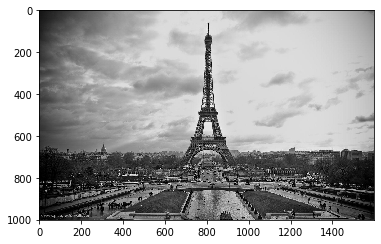

In [8]:
# Print to show the sample image:
print('Image shape: {}'.format(sample_img.shape))
plt.imshow(sample_img, cmap = plt.cm.gray)

It seems like the image have been converted correctly.

#### 2.2.4.2 - Convert into the appropriate format for TF:

To be able to utilise this image with TensorFlow, it will have to be converted into a "Tensor".

In [9]:
sample_img = tf.convert_to_tensor(sample_img, tf.float32, name = 'input_image')

For most TF operations which are conducted in batched images with a shape that is (B, H, W, D), there is a need to synthetically expand the dimensions of the input images in order to turn it into a batch of one single image.

This can be done with the following:

In [10]:
sample_img = tf.expand_dims(sample_img, axis = 0)

The current image is in grayscale with a singel channel. A it does not explicitely have a 4th depth dimension, there is a need to expand the Tensor again.

In [11]:
sample_img = tf.expand_dims(sample_img, axis = -1)

# Check out:
print('Tensor shape: {}'.format(sample_img.shape))

Tensor shape: (1, 1001, 1600, 1)


#### 2.2.4.3 - Performing Convolutions over the image: __Gausssian Blur__

Here for this sample image, a kernel with a shape of 3 x 3 is defined. This particular kernel would be used for blurring images (a.k.a __Gausssian Blur__).

In [12]:
# Gaussian blur kernel:
kernel = tf.constant([[1/16, 2/16, 1/16],
                      [2/16, 4/16, 2/16],
                      [1/16, 2/16, 1/16]
                     ], tf.float32, name = 'gaussian_kernel')

Additionally, further changes would be needed to be made on the Gaussian Blur Kernel above, as the convolution method requires a Kernel Tensor shape of (k, k, D, N). Here, the "k" is the kernel size for a square shaped kernel and "N" is the number of filters. In this example, the Depth (D) = 1 and N = 1, with the reshaping of the Kernel as follows:

In [13]:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis = -1), axis = -1)

#### To filter the input sample image with the Gaussian Blur Kernel, the "tf.nn.conv2d()" method is called:

In [14]:
blurred_image = tf.nn.conv2d(sample_img, kernel, strides=[1, 1, 1, 1], padding="SAME")

Since TF2 is in use, the resulting image from the applied kernel can be obtained in Eager mode.

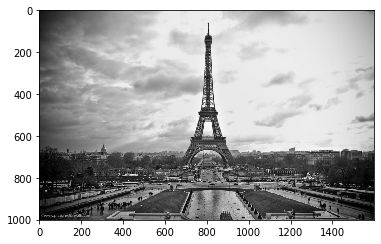

In [15]:
blurred_EifelTower = blurred_image.numpy()

# Unbatch the image: by selecting the first and only image. The depth dimension is also removed.
blurred_EifelTower = blurred_EifelTower[0, ..., 0]

# Print image:
plt.imshow(blurred_EifelTower, cmap = plt.cm.gray)

### Observation:

It is hard to pick out any major changes when compared to the orignal image, but it slightly noticable that the sky's white colour is blurred slightly, making it whiter in colour, while the trees have loss some detail.

#### 2.2.4.4 - Performing Convolutions over the image: __Contour Detection__

Here a __Contour Detecting__ kernel will be applied to the image. The kernel can be defined as the following:

In [16]:
# Contour Detectiong Kernel:
kernel = tf.constant([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]
                     ], tf.float32, name= "edge_kernel")

# Reshape the Kernel for the convolution method:
kernel = tf.expand_dims(tf.expand_dims(kernel, axis = -1), axis = -1)

Here, a larger stride is set. This is demonstrate its effects on the Tensor image.

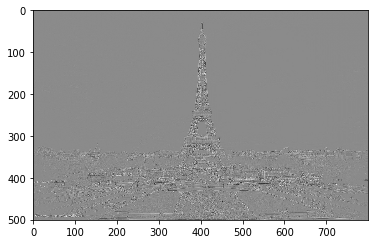

In [17]:
# Set for Larger Stride:
edge_image = tf.nn.conv2d(sample_img, kernel, strides= [1, 2, 2, 1], padding= "SAME")

# Unbatch the image: by selecting the first and only image. The depth dimension is also removed.
edge_EifelTower = edge_image[0, ..., 0]

# Print image:
plt.imshow(edge_EifelTower, cmap = plt.cm.gray)


### Observation:

As it can be seen in the resulting Tensor image, the borders of objects are visible with a white colour border. This is due to the zero padding introduced (setting it to "SAME"), and it is able to detect the contours of the objects by the use of this Kernel. 

#### What if the padding were to be removed?

This can be seen and implemented by setting the padding = "VALID"

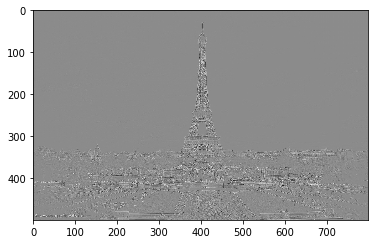

In [18]:
# Set for Larger Stride:
edge_image = tf.nn.conv2d(sample_img, kernel, strides= [1, 2, 2, 1], padding= "VALID")

# Unbatch the image: by selecting the first and only image. The depth dimension is also removed.
edge_EifelTower = edge_image[0, ..., 0]

# Print image:
plt.imshow(edge_EifelTower, cmap = plt.cm.gray)



### Observation:

Although, it is difficult to see, there is a less defined border to the objects in the image.

## 2.3 - Pooling Layers:

Another addtion to CNNs are the __Pooling Layers__. These layers are usually found after each convolutions. 

### 2.3.1 - Concept and Hyperparameters:

Pooling can be thought of as a downscaling of the image data obtained from the previous layers, where it shrinks the image to reduce the pixel density (Reducing the spatial dimensionality of the data). Similarly, each neuron will take the values in its window (receptive field) and return a single output from it by computing the predefined function. Pooling layers are used with a stride value that is the same as the kernel size, to avoid non-overlapping patches. 

There are 2 common method:

- __Max-pooling__: is a layer that returns the maximum value at each depth of the pooled area. Computing the maximum value is the predefined function.
- __Average-pooling__: is a layer that returns the average value at each depth of the pooled area. Computing the average value is the predefined function.

Similar to kernels, the padding and stride of these layers (or windows) can be set to control the dimensions of the resulting tensors.

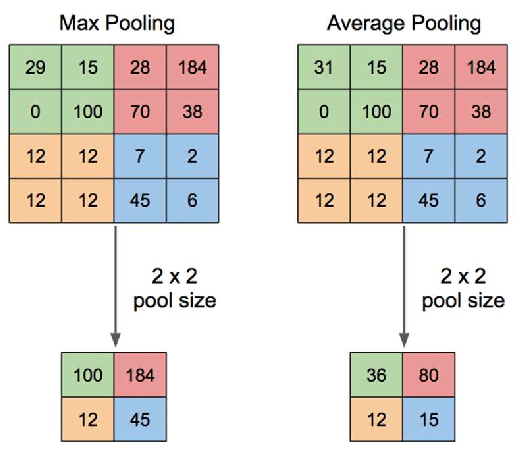

Image ref -> https://www.researchgate.net/figure/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max_fig2_333593451


In [20]:
# Max and Average Pooling: 
display(Image(image_path + 'Max and Avg Pooling.png', width=600, unconfined=True))
print('Image ref -> https://www.researchgate.net/figure/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max_fig2_333593451')

### 2.3.2 - TF and Keras Implementations:


Performing pooling with the available low-level API can be done with "tf.nn.max_pool()" or "tf.nn.avg_pool()". It has a few main parameters such as:
1. input - the batch of input images with a shape of (B, H, W, D), where B is the batch size.
2. ksize - is a list of 4 integers that represents the window size in each dimension. Commonly set ass [1, k , k, 1].
3. strides - consist of a list of 4 integers that represents the stride for each of the dimension of the batched input. Seen as $[1, s_{H}, s_{W}, 1]$
4. padding - this can beeither a list of 4 x 2 integers to represent the padding placed before and after each dimension of the batched input, or it is a string that can be either "VALID" or "SAME".
5. name - is the namde to identify the operation for clearer and readable graphs.

#### 2.3.2.1 - Average Pooling:

Here, the low-level TF API is used to show the following.

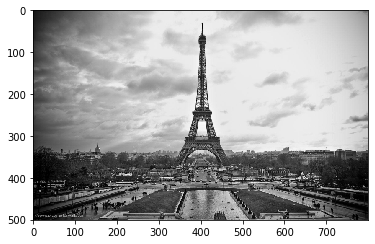

In [21]:
# Apply average pooling on the image:
avg_pooled_img = tf.nn.avg_pool(input = sample_img, ksize = [1, 2, 2, 1], 
                                strides = [1, 2, 2, 1], padding = "SAME")

# Unbatch the image: by selecting the first and only image. The depth dimension is also removed.
avg_EiffelTower = avg_pooled_img.numpy()[0, ..., 0]

# Plot the image:
plt.imshow(avg_EiffelTower, cmap = plt.cm.gray)

#### 2.3.2.2 - Max Pooling:

Here, the low-level TF API is used to show the following.

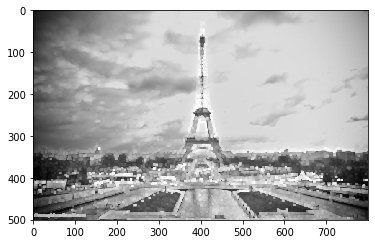

In [23]:
# Apply average pooling on the image:
max_pooled_img = tf.nn.max_pool(input = sample_img, ksize = [1, 10, 10, 1], 
                                strides = [1, 2, 2, 1], padding = "SAME")

# Unbatch the image: by selecting the first and only image. The depth dimension is also removed.
max_EiffelTower = max_pooled_img.numpy()[0, ..., 0]

# Plot the image:
plt.imshow(max_EiffelTower, cmap = plt.cm.gray)

### Observation:

ASs it can be seen to the image above, the max-pooled values (assigns the largest value per window) displays a different effect with the ouput image. 

## 2.4 - Fully Connected Layers:

### 2.4.1 - Usage in CNN Architecture:



### 2.4.2 - TF and Keras Implementations:

## 2.3 - Effective Receptive Fields:

### 2.3.1 - Definition:



### 2.3.2 - Formula




## Summary:

